Using downloaded and verified file: /Users/timreeves/.kipoi/models/DeepBind/downloaded/model_files/Arabidopsis_thaliana/RBP/D00283.001_RNAcompete_At_0284/arch/47896755fdcc65f74c47290e751adcd5
Using downloaded and verified file: /Users/timreeves/.kipoi/models/DeepBind/downloaded/model_files/Arabidopsis_thaliana/RBP/D00283.001_RNAcompete_At_0284/weights/bbb8d0c784a8f577f9047b11f1a6d986
Using downloaded and verified file: /Users/timreeves/.kipoi/models/pwm_HOCOMOCO/downloaded/model_files/human/AHR/weights/385e1e0a87ec36b307b66c4708d4e03e








0it [00:00, ?it/s]





1it [00:00,  3.91it/s]





4it [00:00, 12.01it/s]

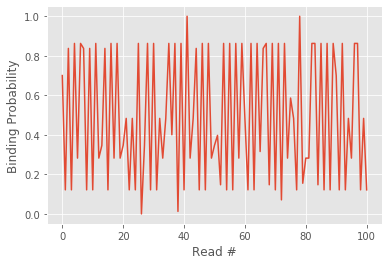

In [20]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import kipoi
import pandas as pd
import matplotlib.pyplot as pyplot
from matplotlib import style
import numpy as np
Fasta = "/Users/timreeves/Desktop/Python_Stuff/Zea_mays.AGPv4.dna.chromosome.9.fa"
BedFile = "/Users/timreeves/Desktop/Python_Stuff/Intervals.bed.txt"
Model = kipoi.get_model('DeepBind/Arabidopsis_thaliana/RBP/D00283.001_RNAcompete_At_0284')
Model = kipoi.get_model('pwm_HOCOMOCO/human/AHR')
Prob = Model.pipeline.predict(dict(fasta_file = Fasta, intervals_file = BedFile))

BedFile = []
st = 0
en = 101
while st < 10201:
    BedFile.append("chr9" + "	" + str(st)+ "	" + str(en))
    st = st + 101
    en = en + 101
data = {'Location' : list(BedFile), 'Probability' : list(Prob)}
df = pd.DataFrame(data)
df = df["Probability"].apply(lambda x: (x - df["Probability"].min()) / (df["Probability"].max() - df["Probability"].min()))

style.use("ggplot")
pyplot.plot(range(len(df.values)), df.values)
pyplot.xlabel("Read #")
pyplot.ylabel("Binding Probability")
pyplot.show()
